In [1]:
# from google.colab import drive
 # drive.mount('/content/gdrive')


## **Import `Packages`**

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import  numpy as np
import  collections
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
import re
import collections
from wordcloud import wordcloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import punkt
sns.set_style("darkgrid")
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# df = pd. read_csv ('/content/gdrive/MyDrive/Natural_Language_Processing/papers.csv')

## **`Load Dataset`  ..**

In [5]:
df = pd. read_csv ('papers.csv')

In [6]:
print (df.shape)
print (df.isnull () .values.any ())

(7241, 7)
True


In [7]:
df.head (10)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
5,1002,1994,Using a neural net to instantiate a deformable...,NaN,1002-using-a-neural-net-to-instantiate-a-defor...,Abstract Missing,U sing a neural net to instantiate a\ndeformab...
6,1003,1994,Plasticity-Mediated Competitive Learning,NaN,1003-plasticity-mediated-competitive-learning.pdf,Abstract Missing,Plasticity-Mediated Competitive Learning\n\nTe...
7,1004,1994,ICEG Morphology Classification using an Analog...,NaN,1004-iceg-morphology-classification-using-an-a...,Abstract Missing,ICEG Morphology Classification using an\nAnalo...
8,1005,1994,Real-Time Control of a Tokamak Plasma Using Ne...,NaN,1005-real-time-control-of-a-tokamak-plasma-usi...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1006,1994,Pulsestream Synapses with Non-Volatile Analogu...,NaN,1006-pulsestream-synapses-with-non-volatile-an...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...


In [8]:
df.drop_duplicates (subset=['title', 'pdf_name'], keep='first', inplace=True)
print (df. shape)

(7241, 7)


In [9]:
df['paper_text'].iloc[2]

'394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\nLONG?TERM POTENTIATION AND DEPRESSION\nOF SYNAPTIC STRENGTHS IN THE HIPPOCAMPUS\nPatric K. Stanton? and Terrence J. Sejnowski t\nDepartment of Biophysics\nJohns Hopkins University\nBaltimore, MD 21218\nABSTRACT\n\nIn modeling studies or memory based on neural networks, both the selective\nenhancement and depression or synaptic strengths are required ror effident storage\nor inrormation (Sejnowski, 1977a,b; Kohonen, 1984; Bienenstock et aI, 1982;\nSejnowski and Tesauro, 1989). We have tested this assumption in the hippocampus,\na cortical structure or the brain that is involved in long-term memory. A brier,\nhigh-frequency activation or excitatory synapses in the hippocampus produces an\nincrease in synaptic strength known as long-term potentiation, or LTP (BUss and\nLomo, 1973), that can last ror many days. LTP is known to be Hebbian since it\nrequires the simultaneous release or neurotransmitter from presynaptic terminals\ncoupled with po

## **Delete `Numerique ` values and keep only Textual ..**

In [10]:
import string
df.paper_text = df.paper_text.str.replace('\d+', '', regex=True)

In [11]:
df.paper_text = df.paper_text.str.replace('\n', ' ', regex=True)

In [12]:
df['paper_text'].iloc[0]

'  SELF-ORGANIZATION OF ASSOCIATIVE DATABASE AND ITS APPLICATIONS Hisashi Suzuki and Suguru Arimoto Osaka University, Toyonaka, Osaka , Japan ABSTRACT An efficient method of self-organizing associative databases is proposed together with applications to robot eyesight systems. The proposed databases can associate any input with some output. In the first half part of discussion, an algorithm of self-organization is proposed. From an aspect of hardware, it produces a new style of neural network. In the latter half part, an applicability to handwritten letter recognition and that to an autonomous mobile robot system are demonstrated.  INTRODUCTION Let a mapping f : X -+ Y be given. Here, X is a finite or infinite set, and Y is another finite or infinite set. A learning machine observes any set of pairs (x, y) sampled randomly from X x Y. (X x Y means the Cartesian product of X and Y.) And, it computes some estimate j : X -+ Y of f to make small, the estimation error in some measure. Usual

Text(0.5, 0, 'Type ')

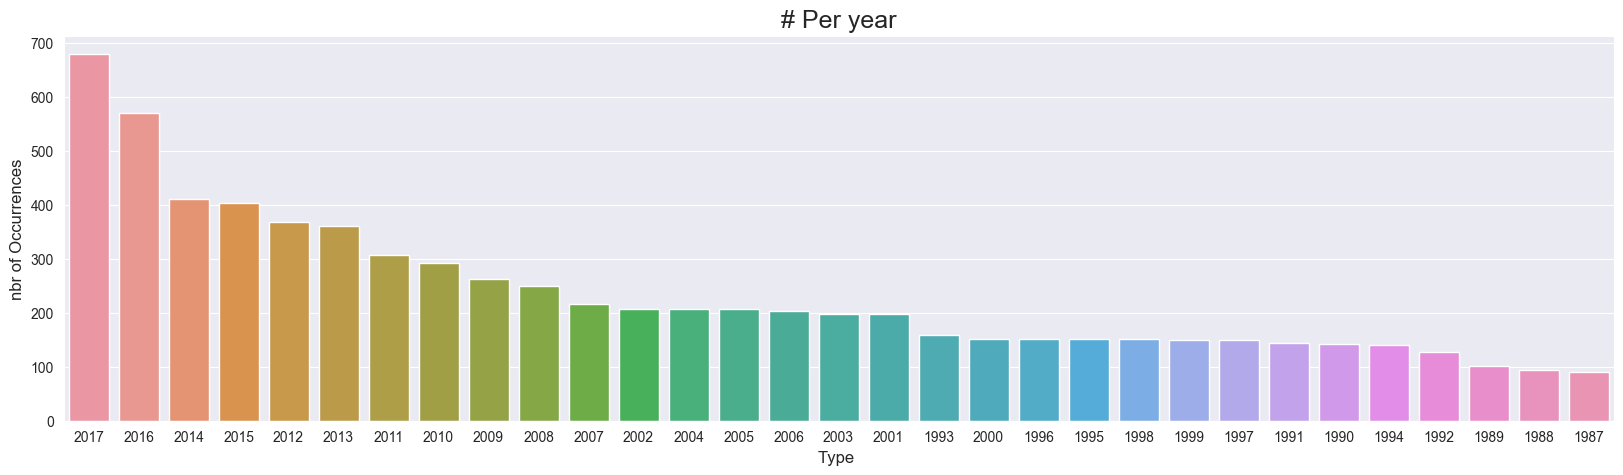

In [13]:
plt. figure (figsize= (20,5) )
ax=sns.countplot (x=df["year"],data=df, order = df ["year"].value_counts().index ),
plt.title("# Per year",fontsize=18)
plt.ylabel('nbr of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

## **`Convert` all Text in `LowerCase` with method lower()** 

In [14]:
df["paper_text"]=df["paper_text"].str.lower()

In [15]:
print(df["paper_text"])

0         self-organization of associative database an...
1         a mean field theory of layer iv of visual co...
2         storing covariance by the associative long?t...
3       bayesian query construction for neural network...
4       neural network ensembles, cross validation, an...
                              ...                        
7236    single transistor learning synapses  paul hasl...
7237    bias, variance and the combination of least sq...
7238    a real time clustering cmos neural engine t. s...
7239    learning direction in global motion: two class...
7240    correlation and interpolation networks for rea...
Name: paper_text, Length: 7241, dtype: object


## **`Delete` Separation point . or ,** 

In [16]:
df["paper_text"]=df["paper_text"].apply(lambda x: re.sub(r'[^\w\s]','',x))

In [17]:
print(df["paper_text"])

0         selforganization of associative database and...
1         a mean field theory of layer iv of visual co...
2         storing covariance by the associative longte...
3       bayesian query construction for neural network...
4       neural network ensembles cross validation and ...
                              ...                        
7236    single transistor learning synapses  paul hasl...
7237    bias variance and the combination of least squ...
7238    a real time clustering cmos neural engine t se...
7239    learning direction in global motion two classe...
7240    correlation and interpolation networks for rea...
Name: paper_text, Length: 7241, dtype: object


## **`Tokenization`:Attribute each word a `Token` in a List** 

In [18]:
df["paper_text"]=df["paper_text"].apply(word_tokenize)

In [19]:
print(df["paper_text"])

0       [selforganization, of, associative, database, ...
1       [a, mean, field, theory, of, layer, iv, of, vi...
2       [storing, covariance, by, the, associative, lo...
3       [bayesian, query, construction, for, neural, n...
4       [neural, network, ensembles, cross, validation...
                              ...                        
7236    [single, transistor, learning, synapses, paul,...
7237    [bias, variance, and, the, combination, of, le...
7238    [a, real, time, clustering, cmos, neural, engi...
7239    [learning, direction, in, global, motion, two,...
7240    [correlation, and, interpolation, networks, fo...
Name: paper_text, Length: 7241, dtype: object


## **Import The `English package` for `stopword` to keep only word supposed to be important and remove (prepositions,have,be ect)** 

In [20]:
stop_words= set(stopwords.words("english"))

In [21]:
df["paper_text"]=df["paper_text"].apply(lambda x: [word for word in x if word not in stop_words])

In [22]:
print(df["paper_text"])

0       [selforganization, associative, database, appl...
1       [mean, field, theory, layer, iv, visual, corte...
2       [storing, covariance, associative, longterm, p...
3       [bayesian, query, construction, neural, networ...
4       [neural, network, ensembles, cross, validation...
                              ...                        
7236    [single, transistor, learning, synapses, paul,...
7237    [bias, variance, combination, least, squares, ...
7238    [real, time, clustering, cmos, neural, engine,...
7239    [learning, direction, global, motion, two, cla...
7240    [correlation, interpolation, networks, realtim...
Name: paper_text, Length: 7241, dtype: object


## **`Stemming`:Replace each word by it `radical `** 

In [23]:
ps=PorterStemmer()

In [24]:
df["paper_text"]=df["paper_text"].apply(lambda x: [ps.stem(word) for word in x])

In [25]:
def remove_single_char_func(text):


    text = [word for word in text if len(word) > 2]
    lmtzr = WordNetLemmatizer()
    text = [lmtzr.lemmatize(word) for word in text]
    return ' '.join(text)

In [26]:

docs = df['paper_text'].apply(lambda x:remove_single_char_func(x))

In [27]:
df["paper_text"]=docs
print(df["paper_text"])

0       selforgan associ databas applic hisashi suzuki...
1       mean field theori layer visual cortex applic a...
2       store covari associ longterm potenti depress s...
3       bayesian queri construct neural network model ...
4       neural network ensembl cross valid activ learn...
                              ...                        
7236    singl transistor learn synaps paul hasler chri...
7237    bia varianc combin least squar estim ronni mei...
7238    real time cluster cmo neural engin serranogota...
7239    learn direct global motion two class psychophy...
7240    correl interpol network realtim express analys...
Name: paper_text, Length: 7241, dtype: object


## **`Remove` the `separation` for words and get them out of List[]** 

In [28]:
df["paper_text"]=df["paper_text"].apply(lambda x:"" .join(x))

In [29]:
print(df["paper_text"])

0       selforgan associ databas applic hisashi suzuki...
1       mean field theori layer visual cortex applic a...
2       store covari associ longterm potenti depress s...
3       bayesian queri construct neural network model ...
4       neural network ensembl cross valid activ learn...
                              ...                        
7236    singl transistor learn synaps paul hasler chri...
7237    bia varianc combin least squar estim ronni mei...
7238    real time cluster cmo neural engin serranogota...
7239    learn direct global motion two class psychophy...
7240    correl interpol network realtim express analys...
Name: paper_text, Length: 7241, dtype: object


In [30]:
tokenized_text = nltk.word_tokenize(df["paper_text"].str.cat (sep=" "))
fdist = nltk.FreqDist(tokenized_text)

## **`Frequency` Distribution of words** 

In [31]:
print(fdist.most_common(10))

[('use', 167427), ('model', 163201), ('learn', 128937), ('algorithm', 117727), ('set', 107645), ('function', 102166), ('data', 91760), ('comput', 78221), ('network', 76494), ('gener', 75331)]


In [32]:

tokenized_text = nltk.word_tokenize(" ".join(df["paper_text"].values.tolist ()))
unigram_counts = Counter(tokenized_text)
top_unigrams = unigram_counts.most_common(10)

In [33]:
unigrams_fd = nltk.FreqDist(nltk.word_tokenize(" ".join(df["paper_text"].tolist())))
bigrams_fd = nltk.FreqDist(nltk.bigrams(nltk.word_tokenize(" ".join(df["paper_text"].tolist()))))
trigrams_fd = nltk.FreqDist(nltk.trigrams(nltk.word_tokenize(" ".join(df["paper_text"].tolist()))))
top_unigrams = unigrams_fd.most_common(10)

In [34]:
top_bigrams = bigrams_fd.most_common(10)


In [35]:
top_trigrams = trigrams_fd.most_common(10)

## **Plot the most frequent `Unigrams`** 

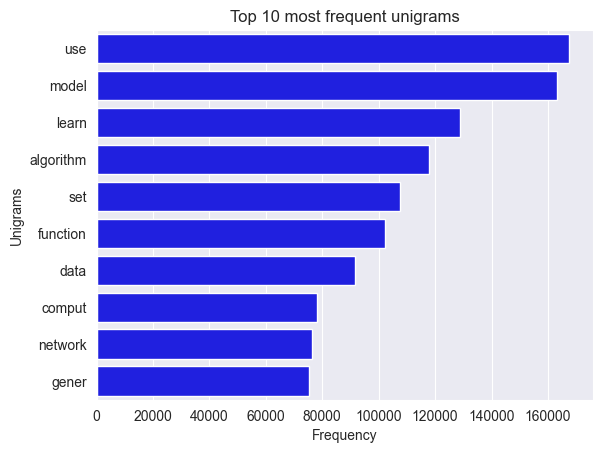

In [36]:
sns.set_style("darkgrid")
sns.barplot(x=[x[1] for x in top_unigrams], y=[x[0] for x in top_unigrams], color="blue") 
plt.title ("Top 10 most frequent unigrams")
plt.xlabel ("Frequency")
plt.ylabel ("Unigrams")
plt.show()

## **Plot the most frequent `Unigrams`** 

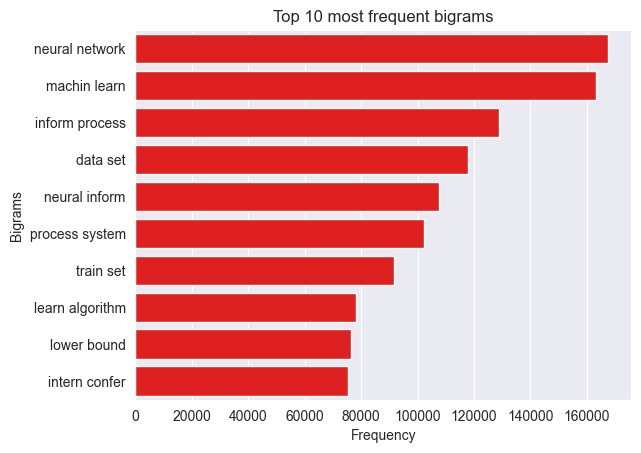

In [37]:
sns.set_style("darkgrid")
sns.barplot(x=[x[1] for x in top_unigrams], y=[" ".join(x[0]) for x in top_bigrams], color="red") 
plt.title ("Top 10 most frequent bigrams")
plt.xlabel ("Frequency")
plt.ylabel ("Bigrams")
plt.show()

## **Plot the most frequent `Trigrams`** 

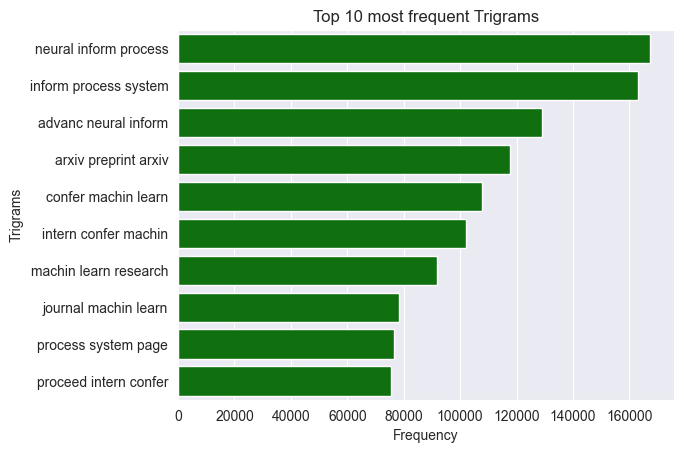

In [38]:
sns.barplot(x=[x[1] for x in top_unigrams], y=[" ".join(x[0]) for x in top_trigrams], color="green") 
plt.title ("Top 10 most frequent Trigrams")
plt.xlabel ("Frequency")
plt.ylabel ("Trigrams")
plt.show()

In [ ]:
''' def partition(x):
    if x <2000:
        return 0
    return 1 '''

## **Classifie Paper_text `for Years`** 

In [ ]:
'''actual_score=df['year']
posnegative=actual_score.map(partition)
df['year']=posnegative
df.head(5)'''

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,0,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,selforgan associ databas applic hisashi suzuki...
1,10,0,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,mean field theori layer visual cortex applic a...
2,100,0,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,store covari associ longterm potenti depress s...
3,1000,0,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,bayesian queri construct neural network model ...
4,1001,0,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,neural network ensembl cross valid activ learn...


## **Drop `Duplicate` cells** 

In [39]:
final=df.drop_duplicates(subset={'pdf_name','abstract','paper_text'},keep='first',inplace=False)
final.shape

(7241, 7)

In [40]:
for i in range(0,1000):
    links=re.findall(r'http\S+',final['paper_text'].values[i])
    for link in links:
     print(link)

httpwwwnecinjneccomhomepageslawr
httplibstatcmuedugeneralmar
httpwwwcscmuedulthrun
httpwwwcsutorontocaneurondelvedelvehtml
httpwwwccgatecheduifacstefanscha
httpwwwccgatecheduifacchrisatkeson
httpwwwccgatecheduifacstefanscha
httpwwwccgatecheduifacchrisatkeson
httpcnlsalkedu
httpwwwsiemensdezfejlllhomepagehtml
httpwwwcscmuedularfaceshtml
httpwwwcsberkeleyedujuelsj
httpwwwcsunmedubapdemoshtml
httpneuralserverastonacuknipsworkshophtml
httpwwwncrgastonacuk
httpwwwfbtluniduisburgdeveroeffentlhtml
httpwwwpcmpcaitecheduanaprosepaul
httpwwwpcmpcaitecheduanaprosepaul
httpwwwncrgastonacuk
httpwwwncrgastonacukgtm
httpwwwmathjyufi
httpwwwc
httpwwwccgatechedulfacstefanscha
httpmarkov
httpwwwstatsoxacukmathi
httpwwwcscmuedulbaluja
httpwwwncrgastonacuk
httphercul
httpwwwncrgastonacuk
httpwwwrobotsoxacuk
httpwwwdemocsbrandeisedu
httpwwwmathrutgersedusontag
httpwwwncrgastonacuk
httpwwwncrgastonac
httpwwwresearchattcomorgsssrpeopleyoav
httpwwwsloansalkedu
httpfacultybiuacil
httpaxonphysikunibremenderdh
h

In [41]:
for i in range (0,7241):
    final['paper_text'].values[i]=re.sub(r"http\S+","",final['paper_text'].values[i])

In [42]:
from bs4 import BeautifulSoup
for i in range (1,7241):
    soup= BeautifulSoup(final['paper_text'].values[i],'html.parser')
    text=soup.get_text()
    final['paper_text'].values[i]=text

In [43]:
'''final_positive=final[final.year==1].sample(n=5000)
final_negative=final[final.year==0].sample(n=1000)
final_balanced=final_positive.append(final_negative,ignore_index=True)
print(final_balanced.shape)'''

'final_positive=final[final.year==1].sample(n=5000)\nfinal_negative=final[final.year==0].sample(n=1000)\nfinal_balanced=final_positive.append(final_negative,ignore_index=True)\nprint(final_balanced.shape)'

In [44]:
final.tail(10)

,id,year,title,event_type,pdf_name,abstract,paper_text
7231,99,1988,Analog Implementation of Shunting Neural Networks,NaN,99-analog-implementation-of-shunting-neural-ne...,Abstract Missing,analog implement shunt neural network bahram n...
7232,990,1994,Learning with Product Units,NaN,990-learning-with-product-units.pdf,Abstract Missing,compar predict accuraci artifici neural networ...
7233,991,1994,Stochastic Dynamics of Three-State Neural Netw...,NaN,991-stochastic-dynamics-of-three-state-neural-...,Abstract Missing,stochast dynam threestat neural network toru o...
7234,992,1994,Grouping Components of Three-Dimensional Movin...,NaN,992-grouping-components-of-three-dimensional-m...,Abstract Missing,group compon threedimension move object area m...
7235,993,1994,Visual Speech Recognition with Stochastic Netw...,NaN,993-visual-speech-recognition-with-stochastic-...,Abstract Missing,visual speech recognit stochast network javier...
7236,994,1994,Single Transistor Learning Synapses,NaN,994-single-transistor-learning-synapses.pdf,Abstract Missing,singl transistor learn synaps paul hasler chri...
7237,996,1994,"Bias, Variance and the Combination of Least Sq...",NaN,996-bias-variance-and-the-combination-of-least...,Abstract Missing,bia varianc combin least squar estim ronni mei...
7238,997,1994,A Real Time Clustering CMOS Neural Engine,NaN,997-a-real-time-clustering-cmos-neural-engine.pdf,Abstract Missing,real time cluster cmo neural engin serranogota...
7239,998,1994,Learning direction in global motion: two class...,NaN,998-learning-direction-in-global-motion-two-cl...,Abstract Missing,learn direct global motion two class psychophy...
7240,999,1994,Correlation and Interpolation Networks for Rea...,NaN,999-correlation-and-interpolation-networks-for...,Abstract Missing,correl interpol network realtim express analys...


In [45]:


def sort_coo(coo_matrix):
    """Sort a dict with highest score"""
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature, score
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results



In [46]:
TOP_K_KEYWORDS = 10 # top k number of keywords to retrieve in a ranked document
def get_keywords(vectorizer, feature_names, doc):
    """Return top k keywords from a doc using TF-IDF method"""

    #generate tf-idf for the given document
    tf_idf_vector = vectorizer.transform([doc])
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(feature_names,sorted_items,TOP_K_KEYWORDS)
    
    return list(keywords.keys())

In [47]:
corpora = final['paper_text'].to_list()

In [54]:
# Initializing TF-IDF Vectorizer with stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# Creating vocab with our corpora
# Exlcluding first 10 docs for testing purpose
vectorizer.fit_transform(corpora[10::])

# Storing vocab
feature_names = vectorizer.get_feature_names()

InvalidParameterError: The 'stop_words' parameter of TfidfVectorizer must be a str among {'english'}, an instance of 'list' or None. Got <WordListCorpusReader in 'C:\\Users\\user\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'> instead.

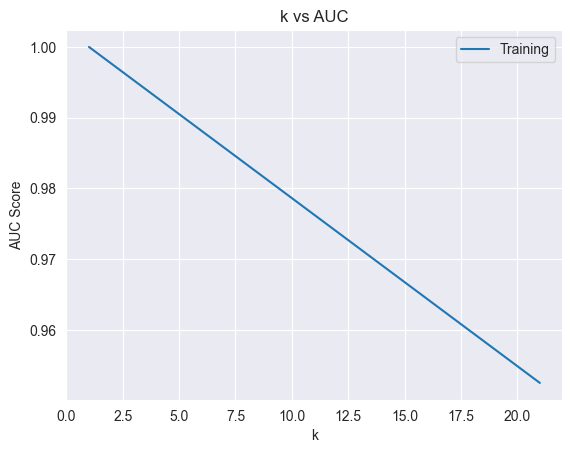

In [ ]:
plt.plot(K,AUC_training,label='Training')

plt.ylabel('AUC Score')
plt.xlabel('k')
plt.title('k vs AUC')
plt.legend()
plt.show()

In [ ]:
Faire recherche sur LSTM

SyntaxError: invalid syntax (2142545965.py, line 1)